In [ ]:
pip install pandas numpy pmdarima yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# Fetch historical stock data from Yahoo Finance
stock_symbols = ["AAPL", "MSFT", "GOOG", "AMZN"]  # Example: Apple, Microsoft, Google
start_date = "2010-01-01"
end_date = "2024-04-30"

stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Close']

# Train-test split
train_data = stock_data.iloc[:-12]  # Using data up to last year as training data
test_data = stock_data.iloc[-12:]   # Using last year's data as test data

[*********************100%%**********************]  4 of 4 completed


In [ ]:
stock_data.describe()

Ticker,AAPL,AMZN,GOOG,MSFT
count,3604.000000,3604.000000,3604.000000,3604.000000
mean,62.628410,65.787915,56.139777,121.937231
std,57.614695,56.481363,41.543683,109.707006
min,6.858929,5.430500,10.861040,23.010000
25%,20.002589,14.535125,22.054086,33.707500
50%,34.705000,42.355000,41.312750,64.620003
75%,115.545626,104.843876,78.305002,212.292500
max,198.110001,189.050003,173.690002,429.369995


In [ ]:
stock_data.head(20)

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,7.643214,6.6950,15.610239,30.950001
2010-01-05,7.656429,6.7345,15.541497,30.959999
2010-01-06,7.534643,6.6125,15.149715,30.770000
2010-01-07,7.520714,6.5000,14.797037,30.450001
2010-01-08,7.570714,6.6760,14.994298,30.660000
2010-01-11,7.503929,6.5155,14.971633,30.270000
2010-01-12,7.418571,6.3675,14.706875,30.070000
2010-01-13,7.523214,6.4555,14.622441,30.350000
2010-01-14,7.479643,6.3675,14.691184,30.959999


In [ ]:
stock_data.tail(20)

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-04-02,168.839996,180.690002,155.869995,421.440002
2024-04-03,169.649994,182.410004,156.369995,420.450012
2024-04-04,168.820007,180.000000,151.940002,417.880005
2024-04-05,169.580002,185.070007,153.940002,425.519989
2024-04-08,168.449997,185.190002,156.139999,424.589996
2024-04-09,169.669998,185.669998,158.139999,426.279999
2024-04-10,167.779999,185.949997,157.660004,423.260010
2024-04-11,175.039993,189.050003,160.789993,427.929993
2024-04-12,176.550003,186.130005,159.190002,421.899994


In [ ]:
# Fit SARIMA model for each stock using auto_arima function
sarima_models = {}
for symbol in stock_symbols:
    sarima_model = auto_arima(train_data[symbol], seasonal=True, m=12, trace=True)
    sarima_models[symbol] = sarima_model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=13082.367, Time=28.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13092.824, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13091.827, Time=4.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13091.635, Time=3.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13094.304, Time=0.18 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=13044.188, Time=27.02 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=13095.555, Time=1.95 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=13051.142, Time=75.03 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=13046.606, Time=27.89 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=13054.988, Time=76.57 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=13093.744, Time=13.19 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=13093.738, Time=12.95 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=46.24 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=inf, Time=37.99 sec
 ARIMA(1

In [ ]:
# Forecast using SARIMA models
forecasts = {}
for symbol in stock_symbols:
    forecast = sarima_models[symbol].predict(n_periods=len(test_data), return_conf_int=True)
    forecast_values = forecast[0]
    forecast_conf_int = forecast[1]
    forecasts[symbol] = (forecast_values, forecast_conf_int)

NameError: name 'sarima_models' is not defined

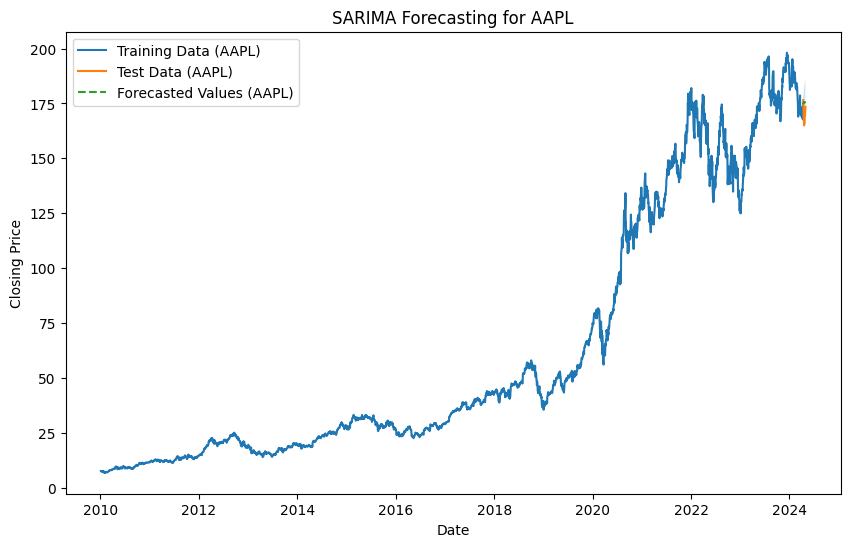

Mean Squared Error (MSE) for AAPL: 46.89928743547168



 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


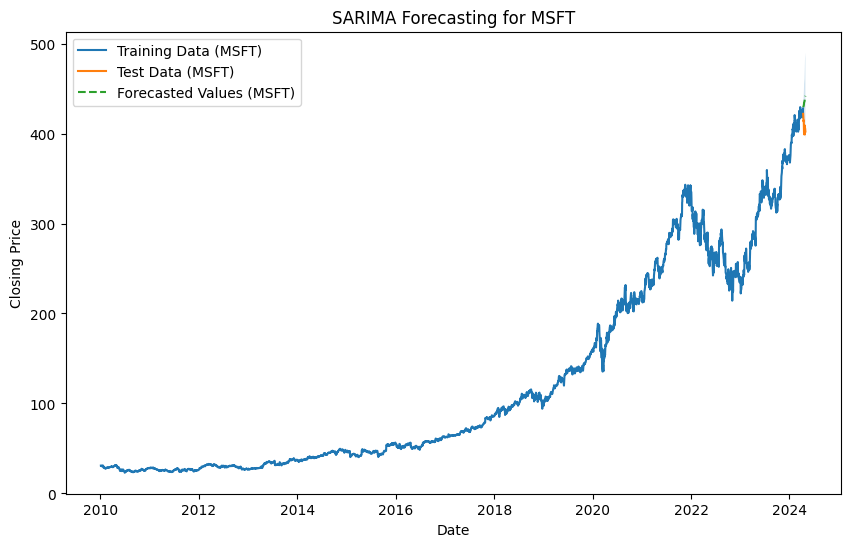

Mean Squared Error (MSE) for MSFT: 854.3175071252855



 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


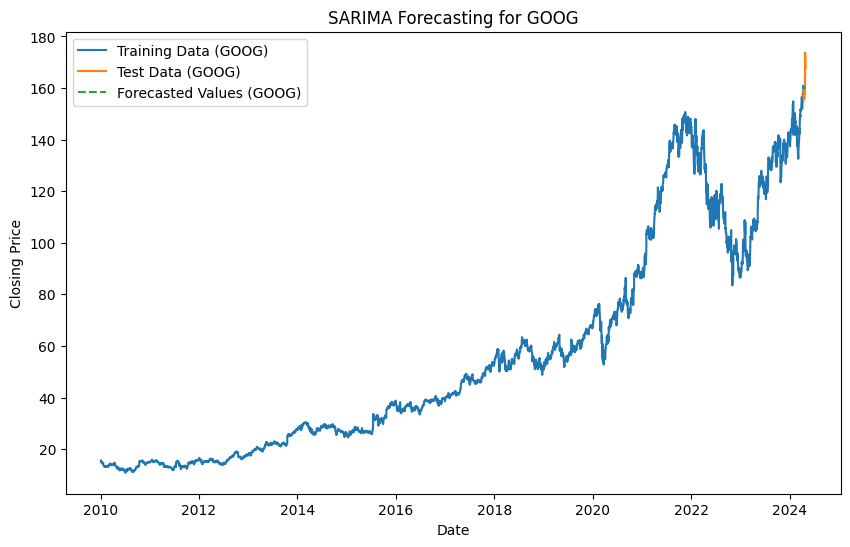

Mean Squared Error (MSE) for GOOG: 27.25620027301106



 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


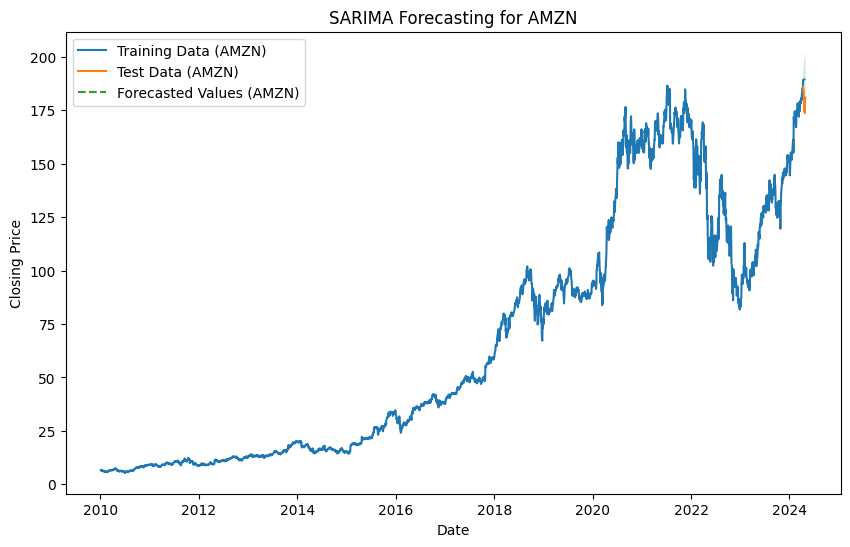

Mean Squared Error (MSE) for AMZN: 108.11634330168027



 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [ ]:
# Plot Stocks trend individually with MSE
for symbol in stock_symbols:
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[symbol], label=f'Training Data ({symbol})')
    plt.plot(test_data.index, test_data[symbol], label=f'Test Data ({symbol})')
    plt.plot(test_data.index, forecasts[symbol][0], label=f'Forecasted Values ({symbol})', linestyle='--')
    plt.fill_between(test_data.index, forecasts[symbol][1][:, 0], forecasts[symbol][1][:, 1], alpha=0.2)
    plt.title(f'SARIMA Forecasting for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    mse = mean_squared_error(test_data[symbol], forecasts[symbol][0])
    mse_values[symbol] = mse
    print(f"Mean Squared Error (MSE) for {symbol}: {mse}")
    print("\n\n\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

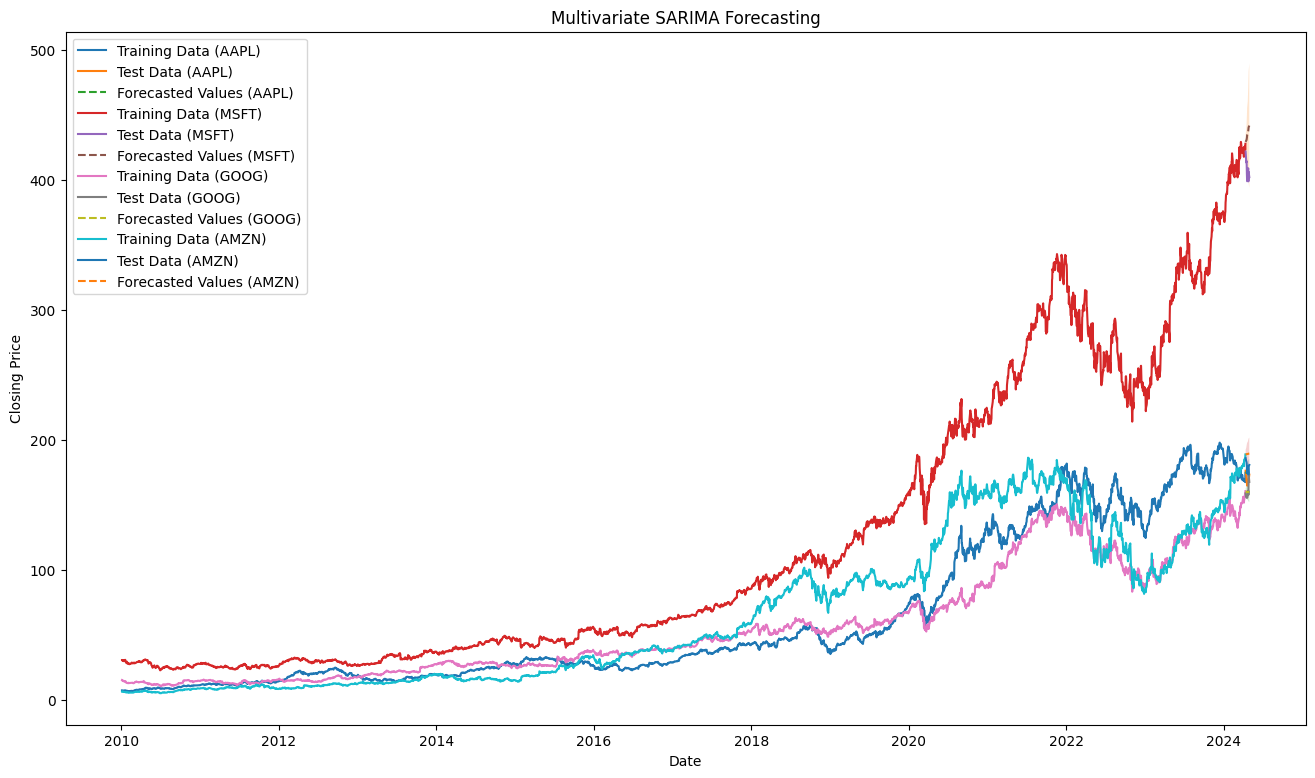

In [ ]:

# Plot the actual vs. forecasted values for each stock
plt.figure(figsize=(16,9))
for symbol in stock_symbols:
    plt.plot(train_data.index, train_data[symbol], label=f'Training Data ({symbol})')
    plt.plot(test_data.index, test_data[symbol], label=f'Test Data ({symbol})')
    plt.plot(test_data.index, forecasts[symbol][0], label=f'Forecasted Values ({symbol})', linestyle='--')
    plt.fill_between(test_data.index, forecasts[symbol][1][:, 0], forecasts[symbol][1][:, 1], alpha=0.2)
plt.title(' SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
# Evaluate model performance using Mean Squared Error (MSE)
mse_values = {}
for symbol in stock_symbols:
    mse = mean_squared_error(test_data[symbol], forecasts[symbol][0])
    mse_values[symbol] = mse
    print(f"Mean Squared Error (MSE) for {symbol}: {mse}")

Mean Squared Error (MSE) for AAPL: 46.89928743547168
Mean Squared Error (MSE) for MSFT: 854.3175071252855
Mean Squared Error (MSE) for GOOG: 27.25620027301106
Mean Squared Error (MSE) for AMZN: 108.11634330168027


In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

[*********************100%%**********************]  1 of 1 completed


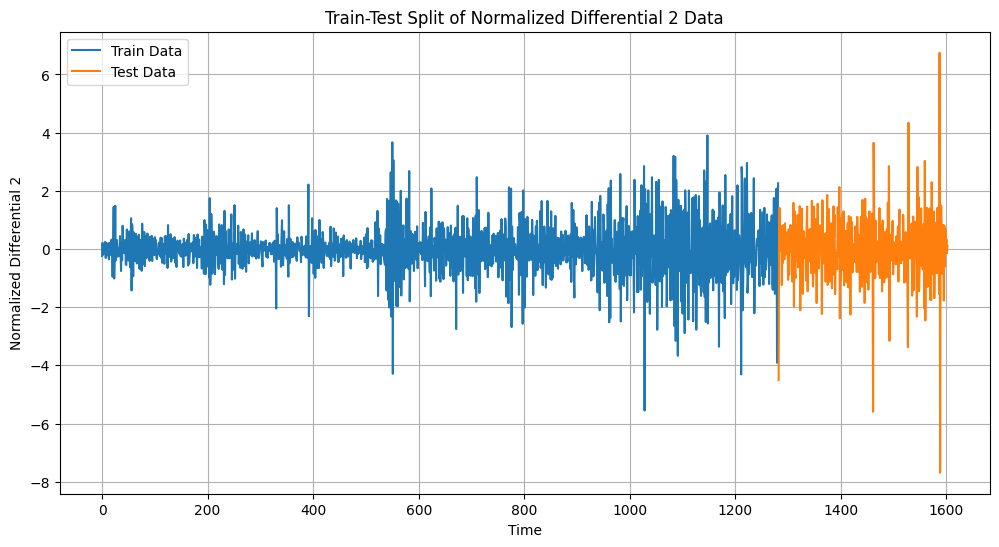

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Step 1: Import yfinance Google data
google_data = yf.download("GOOG", start="2018-01-01", end="2024-05-19")

# Step 2: Normalize it in differential 2
stock_prices = google_data['Close'].values
diff2_stock_prices = np.diff(np.diff(stock_prices))
mean_diff2 = np.mean(diff2_stock_prices)
std_diff2 = np.std(diff2_stock_prices)
normalized_diff2 = (diff2_stock_prices - mean_diff2) / std_diff2

# Step 3: Split it into train and test data
train_data, test_data = train_test_split(normalized_diff2, test_size=0.2, shuffle=False)

# Step 4: Plot the split data of differential 2
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')
plt.xlabel('Time')
plt.ylabel('Normalized Differential 2')
plt.title('Train-Test Split of Normalized Differential 2 Data')
plt.legend()
plt.grid(True)
plt.show()




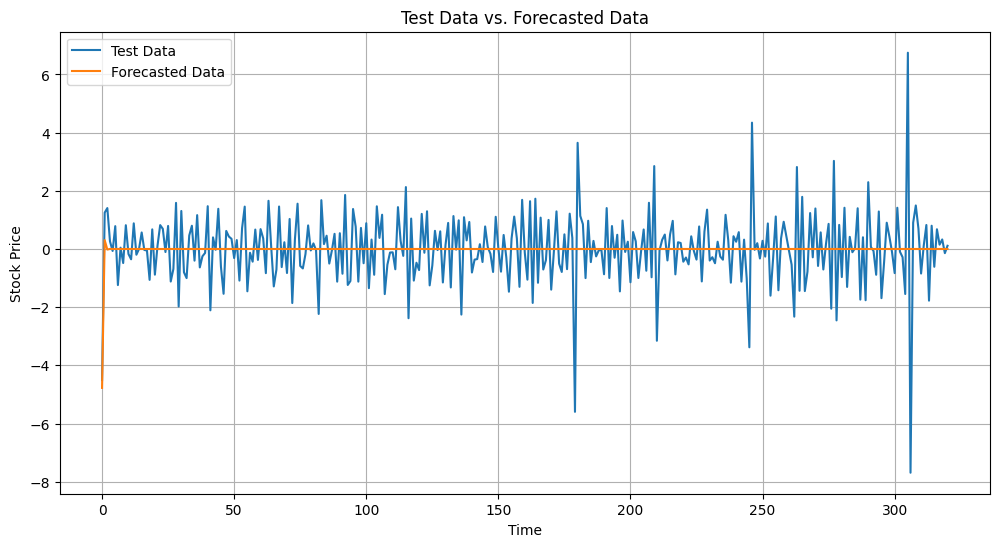

In [ ]:
# Step 5: Forecast the values for test data with SARIMAX
order = (1, 0, 1)  # Order of the ARIMA component
seasonal_order = (0, 0, 0, 0)  # Seasonal order for SARIMA (we don't have seasonal data here)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test_data))

# Step 6: Convert forecasted values back to the normal dataset values
forecast_unnormalized = (forecast * std_diff2) + mean_diff2

# Plot the original test data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), forecast_unnormalized, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Test Data vs. Forecasted Data')
plt.legend()
plt.grid(True)
plt.show()



